In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("master.csv")

In [3]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [4]:
del df['country-year']
del df['HDI for year']
del df['generation']

df['age'] = df['age'].astype('category')
df['age'] = df['age'].cat.codes
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes
df['country'] = df['country'].astype('category')
df['country'] = df['country'].cat.codes
df['year'] = df['year'].astype('category')
df['year'] = df['year'].cat.codes

In [5]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796


In [6]:
from sklearn.preprocessing import StandardScaler
#features = ['country', 'year', 'sex', 'age', 'population', 'gdp_per_capita ($)']


# Separating out the features
#x = df.loc[:, features].values
x = df.loc[:, ['country',]].values

# Separating out the target
y = df.loc[:,['suicides/100k pop',]].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

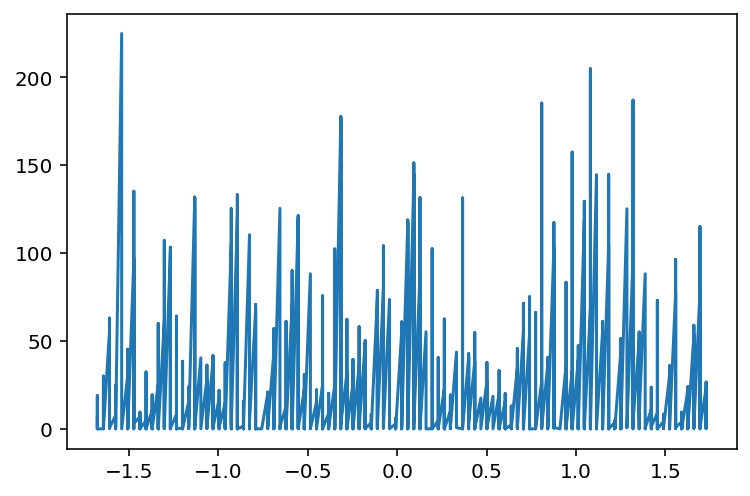

In [7]:
plt.plot(x, y)

In [8]:
df.describe()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,49.275270,16.258375,0.500000,2.499425,242.574407,1.844794e+06,12.816097,16866.464414
std,29.372538,8.469055,0.500009,1.708754,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,24.000000,10.000000,0.000000,1.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,47.000000,17.000000,0.500000,2.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,74.000000,23.000000,1.000000,4.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,100.000000,31.000000,1.000000,5.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [9]:
categories = df
del categories['suicides_no']
del categories['population']
del categories['suicides/100k pop']
del categories['gdp_per_capita ($)']
categories.describe()

,country,year,sex,age
count,27820.000000,27820.000000,27820.000000,27820.000000
mean,49.275270,16.258375,0.500000,2.499425
std,29.372538,8.469055,0.500009,1.708754
min,0.000000,0.000000,0.000000,0.000000
25%,24.000000,10.000000,0.000000,1.000000
50%,47.000000,17.000000,0.500000,2.000000
75%,74.000000,23.000000,1.000000,4.000000
max,100.000000,31.000000,1.000000,5.000000


In [16]:
numeric = df
del numeric['country']
del numeric['year']
del numeric['sex']
del numeric['age']
del numeric['HDI for year']

list = []
for s in numeric[' gdp_for_year ($) ']:
    list.append(s.replace(',', ''))
numeric[' gdp_for_year ($) '] = list
numeric[' gdp_for_year ($) '] = numeric[' gdp_for_year ($) '].astype('int64')

numeric.describe()

,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000
